# #########################################################
# Name: Deepti Lalwani
### Date: 11 December 2023
# Company: Oasis Infobyte
### Description: Python Code Showcase for IRIS FLOWER CLASSIFICATION (Data Science)

This Python script demonstrates a specific aspect of my work at Oasis Infobyte.
# #########################################################

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



#### Load and Preprocess the Data:

In [2]:
df = pd.read_csv("/Users/deeptilalwani/Documents/Data Science/oasis infobyte internship/task 1/iris.csv")

In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Drop the 'Id' column as it is not useful for classification
df = df.drop('Id', axis=1)


In [5]:
# Split the data into features (X) and target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling: 

In [7]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train the Model:

In [8]:
# Choose a classifier (K-nearest neighbors in this case)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)


#### Evaluate the Model:

In [10]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Accuracy:

##### Accuracy is the overall correctness of the model, and a value of 1.0 means perfect accuracy.

### Confusion Matrix:

#### Diagonal elements represent the number of instances that were correctly classified for each class.
#### In our case, all diagonal elements are non-zero, indicating perfect classification.
#### Off-diagonal elements are all zero, suggesting that there are no misclassifications.

### Classification Report:

#### Precision, recall, and F1-score are metrics used to evaluate the performance of a classification model.
#### The values of 1.00 indicate perfect performance for each class.

### Accuracy:

#### Accuracy is the overall correctness of the model, and a value of 1.0 means perfect accuracy.

# It looks like our machine learning model achieved perfect accuracy (1.0), which means it correctly classified all instances in your test set. The confusion matrix and classification report further confirm this by showing zeros in off-diagonal elements and perfect precision, recall, and F1-score values for each class.



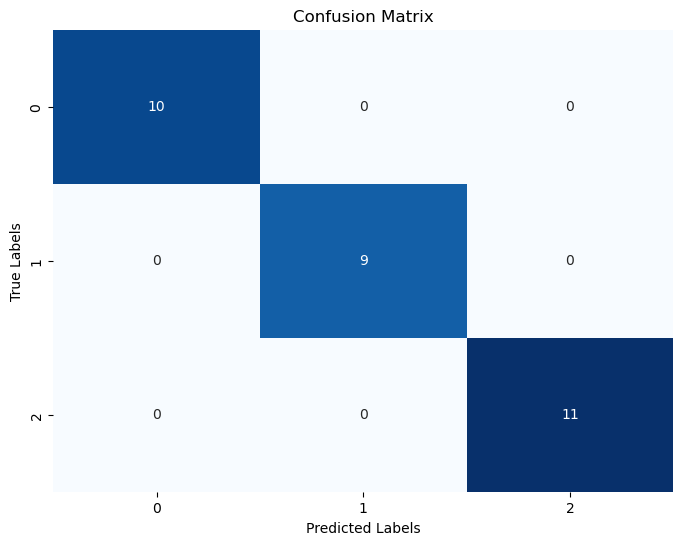

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [12]:
# Let's consider New Data to predict class labels of unseen data

In [13]:
# Example new data
new_data = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.0, 7.3],
    'SepalWidthCm': [3.5, 3.0, 2.8],
    'PetalLengthCm': [1.4, 4.8, 6.5],
    'PetalWidthCm': [0.2, 1.4, 2.3]
})

In [14]:
new_data_scaled = scaler.transform(new_data)  # Using the same scaler from training


In [15]:
# Make predictions for the new data
new_predictions = knn_classifier.predict(new_data_scaled)

#### Inspect Predictions:

In [16]:
print("Predicted Class Labels for New Data:")
print(new_predictions)

Predicted Class Labels for New Data:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
# Display the new data with predicted class labels
new_data_with_predictions = pd.concat([new_data, pd.DataFrame({'PredictedSpecies': new_predictions})], axis=1)
print("New Data with Predicted Class Labels:")
print(new_data_with_predictions)

New Data with Predicted Class Labels:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm PredictedSpecies
0            5.1           3.5            1.4           0.2      Iris-setosa
1            6.0           3.0            4.8           1.4  Iris-versicolor
2            7.3           2.8            6.5           2.3   Iris-virginica
